# Challenge (2/8): Datos abiertos del Instituto Nacional de Estad칤stica y Geograf칤a (INEGI)

춰Bien hecho, Dani! En el reto anterior aprendista mucho. Lograste:
1. Identificar una fuente de datos y consultarla.
2. Acceder a los datos descargados y hacer una breve exploraci칩n sobre ellos.
3. Formular algunas preguntas.
4. Planear c칩mo se ver치 tu dashboard.

Ahora nos toca comenzar a hacer algo de an치lisis exploratorio, comencemos con algunas gr치ficas para datos num칠ricos.

IMPORTANTE: Toma en cuenta las preguntas que planteaste en el reto anterior. Las variables num칠ricas involucradas en esas preguntas deber칤an ser exploradas en este reto con las gr치ficas propuestas.

## 1. Gr치ficas de distribuci칩n

Gr치ficas sugeridas:
- Histograma
- Distribuci칩n de densidad

Completa las siguientes tareas:
1. Selecciona las variables num칠ricas que consideres relevantes para tus preguntas del primer reto.
2. Construye una gr치fica de distribuci칩n por cada una de ellas. Recuerda ajustar el n칰mero de "cortes" (bins) para observar mejor los valores relevantes en la distribuci칩n (solo histogramas).
3. Utiliza el atributo "hue" para que cada histograma represente alguna variable categ칩rica de tu elecci칩n.
4. Utiliza el atributo "col" para generar subplots que representen subconjuntos de datos por categor칤a.

In [282]:
# Importaci칩n de librer칤as
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns

In [170]:
# Setting of style
sns.set_theme(context = 'notebook', style = 'darkgrid')

In [171]:
# Estableciendo salida de las figuras como SVG
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

In [172]:
# Carga de datos desde Colab
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [173]:
# Carga del dataframe
%cd /content/drive/MyDrive/Colab Notebooks/conjunto_de_datos/
df = pd.read_csv('denue_inegi_54_.csv', encoding = 'ISO-8859-1') # Categor칤a de "Servicios profesionales, cient칤ficos y t칠cnicos" (2022) del DENUE

# Para los campos de tipo fecha se convirti칩 el campo fecha_alta de object a date
df['fecha_alta'] = pd.to_datetime(df['fecha_alta'], errors = 'coerce', yearfirst=True, infer_datetime_format = True)

df.head()

/content/drive/MyDrive/Colab Notebooks/conjunto_de_datos


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


id                          clee              nom_estab  \
0  8525230  01001541310000931000000000U2       11:11 ARQUITECOS   
1  6905372  01001541510000971000000000U3              5TO COLOR   
2  6142345  01001236113000073010000000U1       9.15 ARQUITECTOS   
3    37160  01001541110003931000000000U3  A&A DESPACHO JURIDICO   
4    10599  01001541910000031001000000U8                 AB MKT   

            raz_social  codigo_act  \
0                  NaN      541310   
1                  NaN      541510   
2                  NaN      541310   
3                  NaN      541110   
4  AB MERCADOTECNIA SC      541910   

                                          nombre_act           per_ocu  \
0                          Servicios de arquitectura    0 a 5 personas   
1  Servicios de dise침o de sistemas de c칩mputo y s...    0 a 5 personas   
2                          Servicios de arquitectura  11 a 30 personas   
3                                  Bufetes jur칤dicos    0 a 5 personas   
4  Servicios de investigaci칩n de mercados y encue...   6 a 10 personas   

   tipo_vial                 nom_vial tipo_v_e_1  ...       localidad  ageb  \
0      CALLE  GENERAL MIGUEL BARRAGAN    PRIVADA  ...  Aguascalientes  0549   
1      CALLE               MAR CARIBE      CALLE  ...  Aguascalientes  2009   
2      CALLE          SIERRA DEL HUMO    AVENIDA  ...  Aguascalientes  2259   
3      CALLE               CHICHIMECO    AVENIDA  ...  Aguascalientes  0816   
4  BOULEVARD     LUIS DONALDO COLOSIO      CALLE  ...  Aguascalientes  2390   

  manzana      telefono                     correoelec  \
0      21  4498041302.0  CHRISTIAN@1111ARQUITECTOS.COM   
1      18           NaN      5T0COLORESTUDIO@GMAIL.COM   
2       8  4491290879.0            GERENCIA@9.15ARQ.MX   
3      43           NaN            ARIASGO@HOTMAIL.COM   
4      19  4499128611.0                            NaN   

                       www tipoUniEco    latitud    longitud  fecha_alta  
0  WWW.1111ARQUITECTOS.COM       Fijo  21.888813 -102.288903  2019-11-01  
1                      NaN       Fijo  21.898620 -102.313587  2019-11-01  
2            WWW.915ARQ.MX       Fijo  21.913782 -102.312156  2010-07-01  
3                      NaN       Fijo  21.877087 -102.280368  2014-12-01  
4  WWW.ABMERCADOTECNIA.COM       Fijo  21.924182 -102.311750  2010-07-01  

[5 rows x 42 columns]

In [174]:
# Informaci칩n de las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107880 entries, 0 to 107879
Data columns (total 42 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id          107880 non-null  int64         
 1   clee        107880 non-null  object        
 2   nom_estab   107880 non-null  object        
 3   raz_social  30169 non-null   object        
 4   codigo_act  107880 non-null  int64         
 5   nombre_act  107880 non-null  object        
 6   per_ocu     107880 non-null  object        
 7   tipo_vial   107199 non-null  object        
 8   nom_vial    107878 non-null  object        
 9   tipo_v_e_1  107321 non-null  object        
 10  nom_v_e_1   107687 non-null  object        
 11  tipo_v_e_2  107319 non-null  object        
 12  nom_v_e_2   107682 non-null  object        
 13  tipo_v_e_3  107323 non-null  object        
 14  nom_v_e_3   107634 non-null  object        
 15  numero_ext  92941 non-null   float64       
 16  le

Se crear치n histogramas para el **n칰mero de personas empleadas** en las organizaciones oferentes de **servicios profesionales, cient칤ficos y t칠cnicos**.

Para ello, primero se limpiar치n los datos de la columna *per_ocu* del dataset.

In [175]:
# Limpieza de la columna per_ocu
df['per_ocu'] = df['per_ocu'].map(lambda x: x.replace(' a ', '-').replace(' personas', ''))

In [176]:
# Set de los rangos de personas ocupadas
set(df['per_ocu'])

{'0-5', '101-250', '11-30', '251 y m치s', '31-50', '51-100', '6-10'}

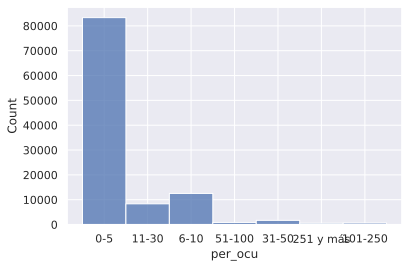

In [177]:
# Histograma
order = ['0-5', '6-10', '11-30', '31-50', '51-100', '101-250', '251 y m치s']
sns.histplot(data = df, x = 'per_ocu')

El histograma anterior no ha desplegado los bines en el orden correcto debido a que la variable *x* consiste de strings y no de n칰meros. Por lo que se proceder치 a convertir los rangos en n칰meros por medio del promedio de sus respectivos intervalos.

In [178]:
# Funci칩n para convertir los rangos de personas empleadas en n칰meros enteros
def cleaner(x):
  r = list()
  if x == '251 y m치s':
    r.append(251)
  else:
    x = x.split('-')
    for i in x:
      r.append(int(i))
  
  return r

In [179]:
# Creaci칩n de una nueva columna con los promedios de los rangos de personas empleadas
df['per_ocu_int'] = df['per_ocu'].apply(lambda x: np.mean(cleaner(x)))
df['per_ocu_int'].head()

0     2.5
1     2.5
2    20.5
3     2.5
4     8.0
Name: per_ocu_int, dtype: float64

In [180]:
# Clasificacion de actividades por el INEGI
df['nombre_act'].value_counts()

Bufetes jur칤dicos                                                                                                                                         23759
Servicios de contabilidad y auditor칤a                                                                                                                     17236
Servicios veterinarios para mascotas prestados por el sector privado                                                                                      12025
Servicios de fotograf칤a y videograbaci칩n                                                                                                                  11192
Servicios de consultor칤a en administraci칩n                                                                                                                 6208
Agencias de publicidad                                                                                                                                     4304
Dise침o gr치fico                          

En el presente estudio, se emplear치 la categor칤a **_"Servicios de dise침o de sistemas de c칩mputo y servicios relacionados"_** del INEGI para efectuar algunos an치lisis posteriores debido a que es la m치s cercana a lo que se desea evaluar, que son las organizaciones oferentes de servicios en tecnolog칤as de la informaci칩n.

In [181]:
len(df['per_ocu_int'].unique())

7

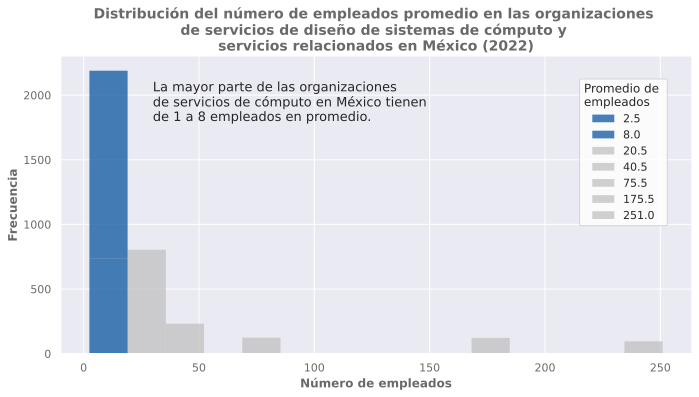

In [281]:
# Histograma del n칰mero de personas ocupadas en las organizaciones oferentes de Servicios de dise침o de sistemas de c칩mputo y servicios relacionados
palette = ['silver',]*5
palette.insert(0, sns.color_palette('Blues_r')[0])
palette.insert(1, sns.color_palette('Blues_r')[0])
g = sns.displot(data = df[df['nombre_act'] == 'Servicios de dise침o de sistemas de c칩mputo y servicios relacionados'], x = 'per_ocu_int', bins = 15,
            height=5, aspect=2, palette = palette, hue = 'per_ocu_int',  multiple="stack", linewidth=0)
plt.xlabel('N칰mero de empleados', fontweight = 'bold', color = 'dimgray', fontsize = 12)
plt.ylabel('Frecuencia', fontweight = 'bold', color = 'dimgray', fontsize = 12)
plt.xticks(color = 'dimgray')
plt.yticks(color = 'dimgray')
sns.move_legend(g, "upper left", bbox_to_anchor=(0.72, 0.9), title='Promedio de \nempleados', facecolor = 'white')
plt.title('Distribuci칩n del n칰mero de empleados promedio en las organizaciones \nde servicios de \
dise침o de sistemas de c칩mputo y \nservicios relacionados en M칠xico (2022)', fontweight = 'bold', color = 'dimgray', fontsize = 14)
plt.text(30,1800, "La mayor parte de las organizaciones \nde servicios de c칩mputo en M칠xico tienen \nde 1 a 8 empleados en promedio.", fontsize = 13)
plt.show()


Se observa del histograma anterior que la mayor칤a de las organizaciones tiene menos de 50 empleados.

Text(105, 200, 'La organizaciones de servicios de \nc칩mputo con m치s empleados tienden \na ubicarse en Ciudad de M칠xico.')

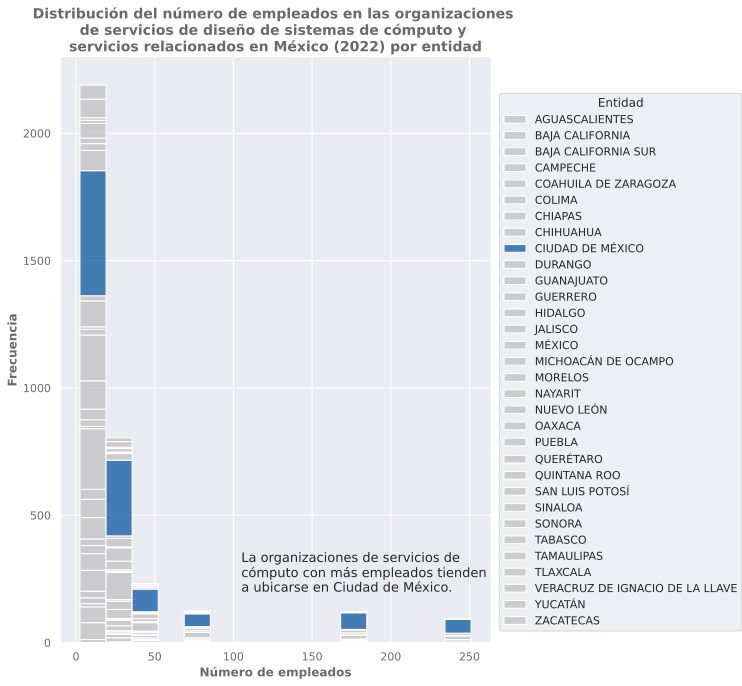

In [205]:
# Histograma apilado del n칰mero de personas ocupadas en las organizaciones oferentes de servicios de dise침o de sistemas de c칩mputo y servicios relacionados por Estado 
palette = ['silver',]*31
palette.insert(8, sns.color_palette('Blues_r')[0])
g = sns.displot(data = df[df['nombre_act'] == 'Servicios de dise침o de sistemas de c칩mputo y servicios relacionados'], 
            x = 'per_ocu_int', bins = 15, hue = 'entidad',  palette = palette, multiple="stack", height = 9, aspect=0.8)
plt.xlabel('N칰mero de empleados', fontweight = 'bold', color = 'dimgray', fontsize = 12)
plt.ylabel('Frecuencia', fontweight = 'bold', color = 'dimgray', fontsize = 12)
plt.xticks(color = 'dimgray')
plt.yticks(color = 'dimgray')
sns.move_legend(g, "center left", bbox_to_anchor=(0.65, 0.5), title='Entidad')
plt.title('Distribuci칩n del n칰mero de empleados en las organizaciones \nde servicios de \
dise침o de sistemas de c칩mputo y \nservicios relacionados en M칠xico (2022) por entidad', fontweight = 'bold', color = 'dimgray', fontsize = 14)
plt.text(105,200, "La organizaciones de servicios de \nc칩mputo con m치s empleados tienden \na ubicarse en Ciudad de M칠xico.", fontsize = 13)


Del histograma anterior se observa que la Ciudad de M칠xico es la entidad federativa en donde m치s se concentran las organizaciones oferentes de servicios de dise침o de sistemas de c칩mputo y servicios relacionados.

Adem치s, la Ciudad de M칠xico es la entidad en donde se encuentran las organizaciones m치s grandes, que emplean a un mayor n칰mero de personas.

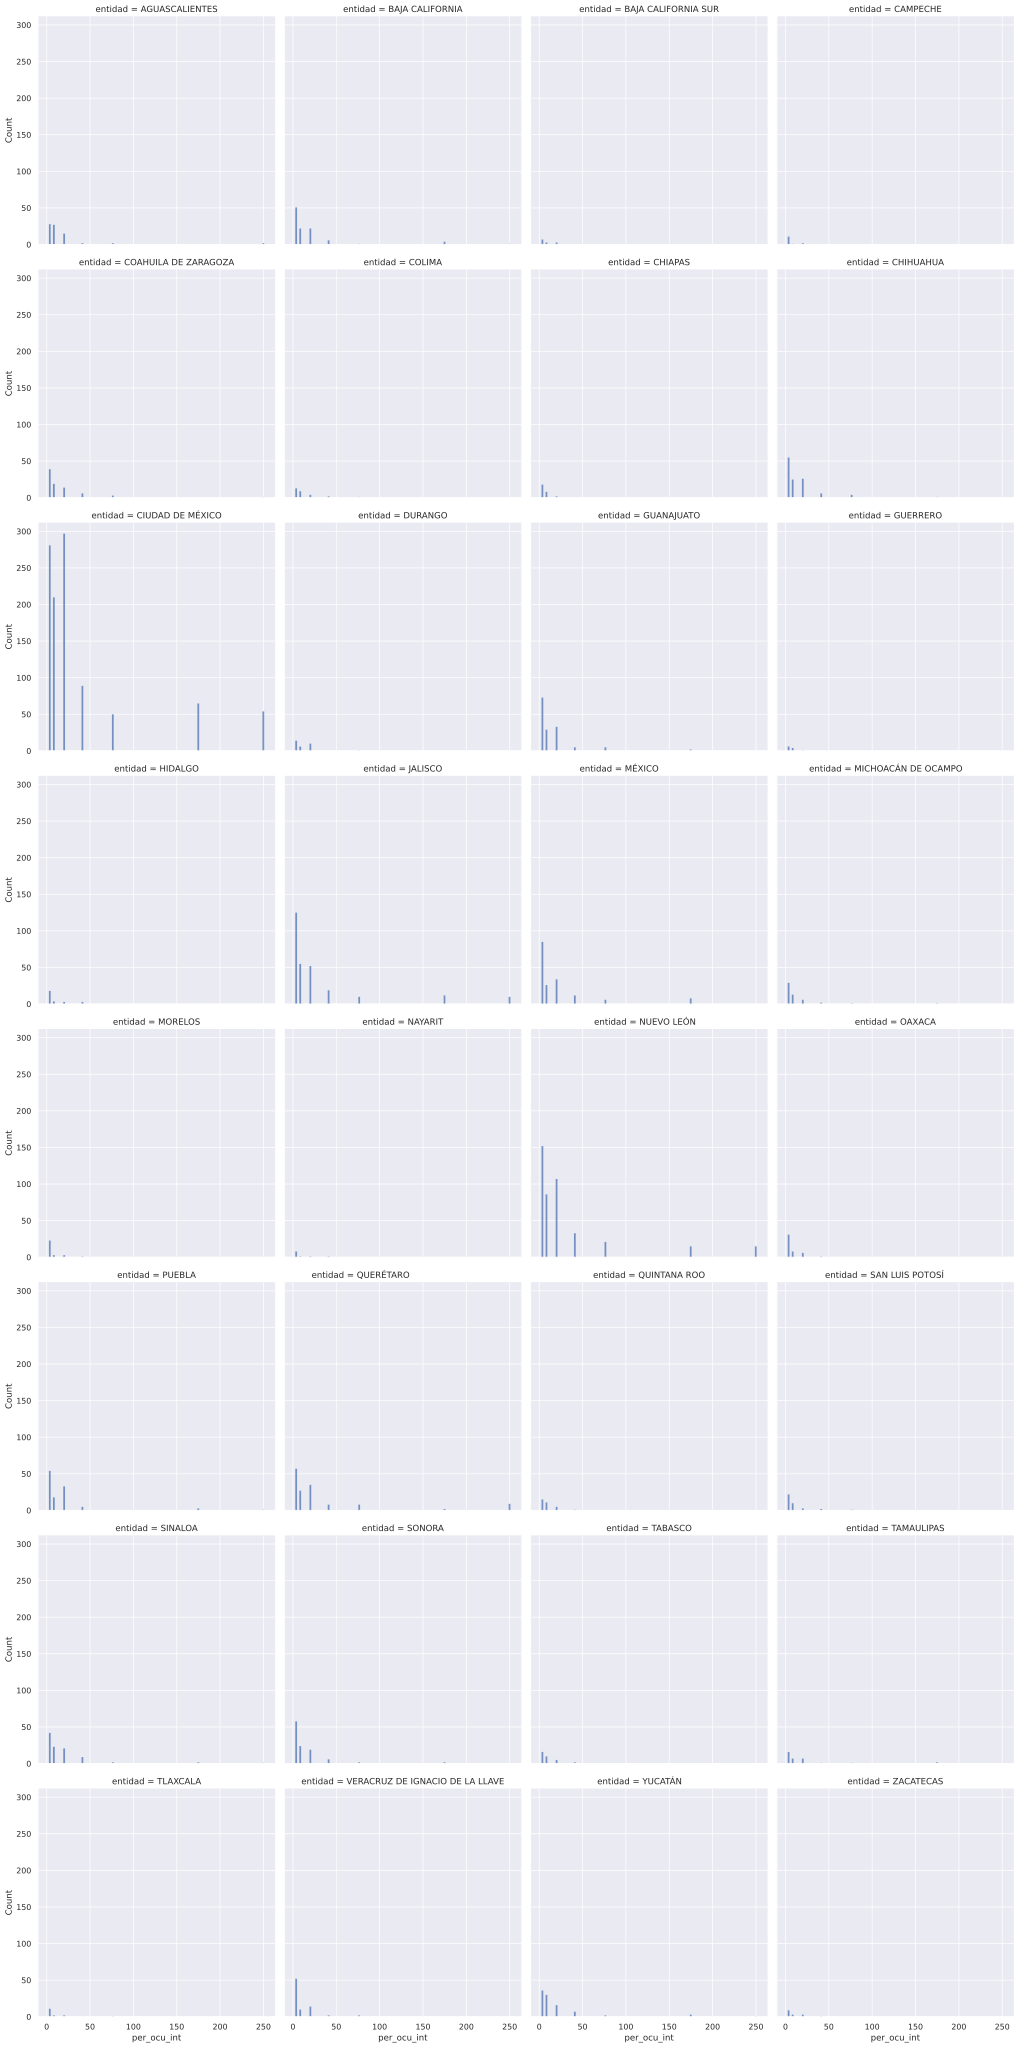

In [184]:
# Histogramas del n칰mero de personas ocupadas en las organizaciones oferentes de servicios de dise침o de sistemas de c칩mputo y servicios relacionados por Estado 
sns.displot(data = df[df['nombre_act'] == 'Servicios de dise침o de sistemas de c칩mputo y servicios relacionados'],
            x = 'per_ocu_int', col = 'entidad', col_wrap = 4)

Del conjunto de histogramas anterior se puede concluir que en la inmensa mayor칤a de las entidades federativas del pa칤s, las unidades oferentes de servicios de dise침o de sistemas de c칩mputo y servicios relacionados son organizaciones muy peque침as (MiPyMEs) que s칩lo cuentan con 1 a 5 empleados. 

## 2. Gr치ficas de dispersi칩n

- Scatter plot
- Pairplot
- Displot en su modalidad tipo heatmap

In [185]:
# Dataset con el n칰mero de organizaciones y promedio de personas ocupadas por tipo de actividad
df_scatter_act = df.groupby(by = 'nombre_act', as_index = False).agg(count=('per_ocu_int', 'count'), mean_per_ocu=('per_ocu_int', 'mean')).\
                  sort_values(by = 'count', ascending = False)

df_scatter_act.head()

nombre_act  count  mean_per_ocu
6                                   Bufetes jur칤dicos  23759      4.219938
22              Servicios de contabilidad y auditor칤a  17236      7.298445
39  Servicios veterinarios para mascotas prestados...  12025      3.047526
26           Servicios de fotograf칤a y videograbaci칩n  11192      2.766708
20         Servicios de consultor칤a en administraci칩n   6208     22.452239

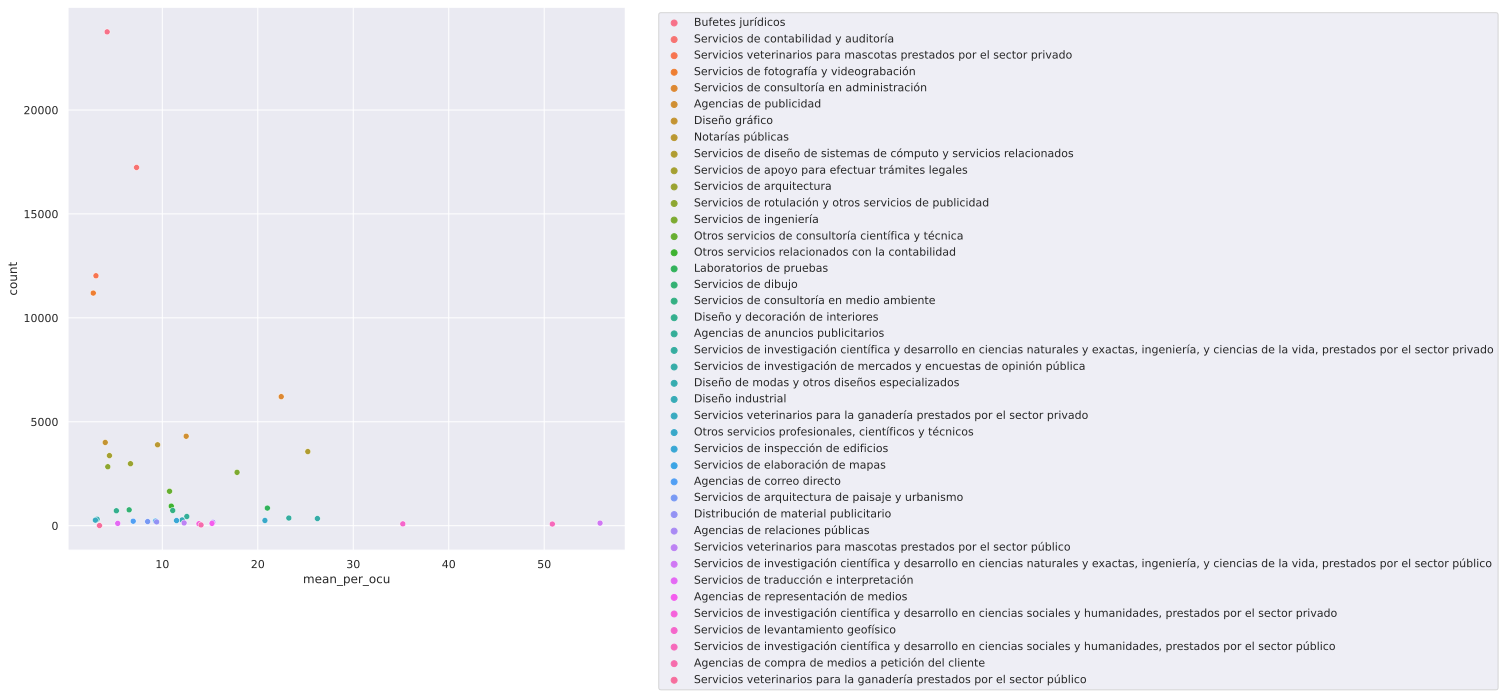

In [186]:
# Gr치fica de dispersi칩n del n칰mero de organizaciones vs. promedio de personas ocupadas por tipo de actividad
fig = plt.subplots(figsize = (10,10))
sns.scatterplot(data = df_scatter_act,
                x = 'mean_per_ocu',
                y = 'count',
                hue = 'nombre_act'
                )
plt.legend(loc = 'best', bbox_to_anchor=(1.05, 1))

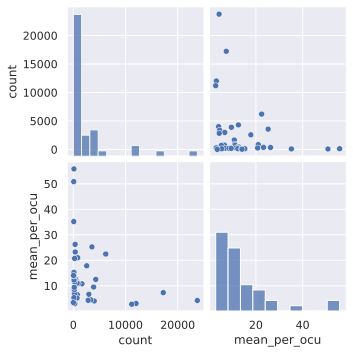

In [187]:
# Pairplot del n칰mero de organizaciones vs. promedio de personas ocupadas por tipo de actividad
sns.pairplot(data = df_scatter_act,
                )

El gr치fico de dispersi칩n y el pairplot anteriores sugieren que no hay correlaci칩n entre el n칰mero de organizaciones y el n칰mero de empleados ocupados por tipo de actividad.

In [188]:
# Dataset con el n칰mero de organizaciones y promedio de personas ocupadas por entidad
df_scatter_entidad = df.groupby(by = 'entidad', as_index = False).agg(count=('per_ocu_int', 'count'), mean_per_ocu=('per_ocu_int', 'mean')).\
                      sort_values(by='count', ascending = False)

df_scatter_entidad.head()

entidad  count  mean_per_ocu
6               CIUDAD DE M칄XICO  14374     17.710693
16  M칄XICO                        10317      5.493360
13                       JALISCO   8101      8.418405
10                    GUANAJUATO   5496      5.250273
20                        PUEBLA   5377      6.024084

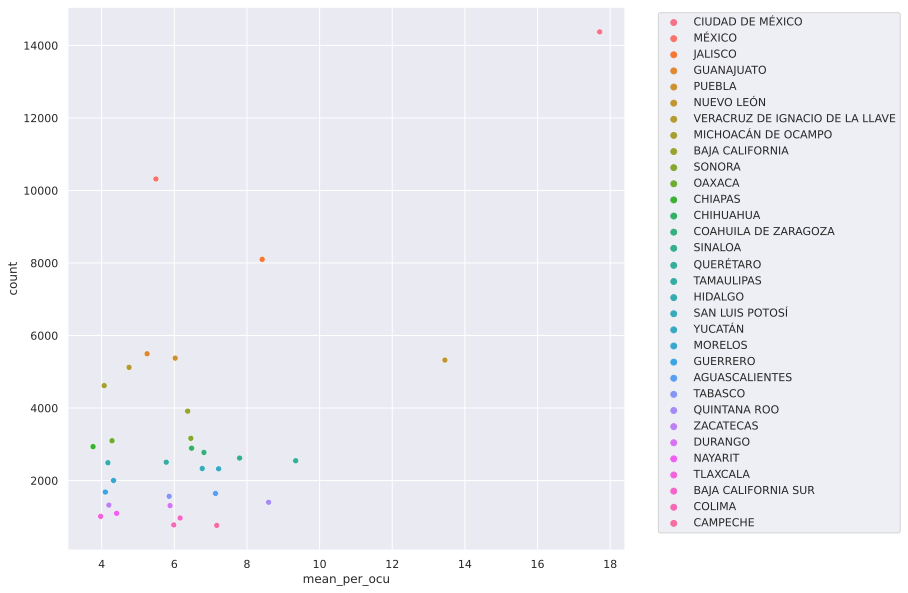

In [189]:
# Gr치fica de dispersi칩n con el n칰mero de organizaciones vs. promedio de personas ocupadas por entidad
fig = plt.subplots(figsize = (10,10))
sns.scatterplot(data = df_scatter_entidad,
                x = 'mean_per_ocu',
                y = 'count',
                hue = 'entidad',
                #palette = 'mako'
                )
plt.legend(loc = 'best', bbox_to_anchor=(1.05, 1))

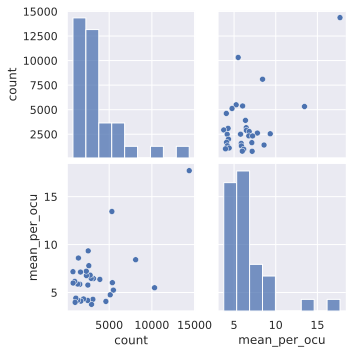

In [190]:
# Pairplot con el n칰mero de organizaciones vs. promedio de personas ocupadas por entidad
sns.pairplot(data = df_scatter_entidad,
                )

El gr치fico de dispersi칩n y el pairplot anteriores sugieren una leve correlaci칩n entre el n칰mero de organizaciones y el n칰mero de empleados ocupados por entidad. En particular, la Ciudad de M칠xico, el Estado de M칠xico, Jalisco y Nuevo Le칩n exhiben una alta correlaci칩n entre ambas variables, lo que indica que existen muchas organizaciones oferentes de servicios t칠cnicos, cient칤ficos y profesionales en dichas entidades, y que esas tienen a ser m치s grandes y contar con m치s empleados.

In [191]:
# Dataset para construir un mapa de calor con el n칰mero de organizaciones por tipo de actividad y entidad
df_heatmap_count = pd.pivot_table(df[['nombre_act', 'entidad']], index = 'nombre_act', columns = 'entidad', aggfunc = 'size', fill_value = 0)
df_heatmap_count.index = df_heatmap_count.index.map(lambda x: x[:100])
df_heatmap_count.head()

entidad                                             AGUASCALIENTES  \
nombre_act                                                           
Agencias de anuncios publicitarios                               9   
Agencias de compra de medios a petici칩n del cli...               1   
Agencias de correo directo                                       3   
Agencias de publicidad                                          57   
Agencias de relaciones p칰blicas                                  1   

entidad                                             BAJA CALIFORNIA  \
nombre_act                                                            
Agencias de anuncios publicitarios                               16   
Agencias de compra de medios a petici칩n del cli...                2   
Agencias de correo directo                                       13   
Agencias de publicidad                                          140   
Agencias de relaciones p칰blicas                                   3   

entidad                                             BAJA CALIFORNIA SUR  \
nombre_act                                                                
Agencias de anuncios publicitarios                                    5   
Agencias de compra de medios a petici칩n del cli...                    0   
Agencias de correo directo                                            2   
Agencias de publicidad                                               32   
Agencias de relaciones p칰blicas                                       1   

entidad                                             CAMPECHE  CHIAPAS  \
nombre_act                                                              
Agencias de anuncios publicitarios                         2       10   
Agencias de compra de medios a petici칩n del cli...         0        1   
Agencias de correo directo                                 1        4   
Agencias de publicidad                                    24       75   
Agencias de relaciones p칰blicas                            2        1   

entidad                                             CHIHUAHUA  \
nombre_act                                                      
Agencias de anuncios publicitarios                         19   
Agencias de compra de medios a petici칩n del cli...          1   
Agencias de correo directo                                  6   
Agencias de publicidad                                    114   
Agencias de relaciones p칰blicas                             5   

entidad                                             CIUDAD DE M칄XICO  \
nombre_act                                                             
Agencias de anuncios publicitarios                                83   
Agencias de compra de medios a petici칩n del cli...                14   
Agencias de correo directo                                        49   
Agencias de publicidad                                           905   
Agencias de relaciones p칰blicas                                   66   

entidad                                             COAHUILA DE ZARAGOZA  \
nombre_act                                                                 
Agencias de anuncios publicitarios                                    16   
Agencias de compra de medios a petici칩n del cli...                     1   
Agencias de correo directo                                             8   
Agencias de publicidad                                                99   
Agencias de relaciones p칰blicas                                        5   

entidad                                             COLIMA  DURANGO  ...  \
nombre_act                                                           ...   
Agencias de anuncios publicitarios                       5        4  ...   
Agencias de compra de medios a petici칩n del cli...       0        0  ...   
Agencias de correo directo                               2        1  ...   
Agencias de publicidad                                  31       50  ...   
Agencias de relaciones 

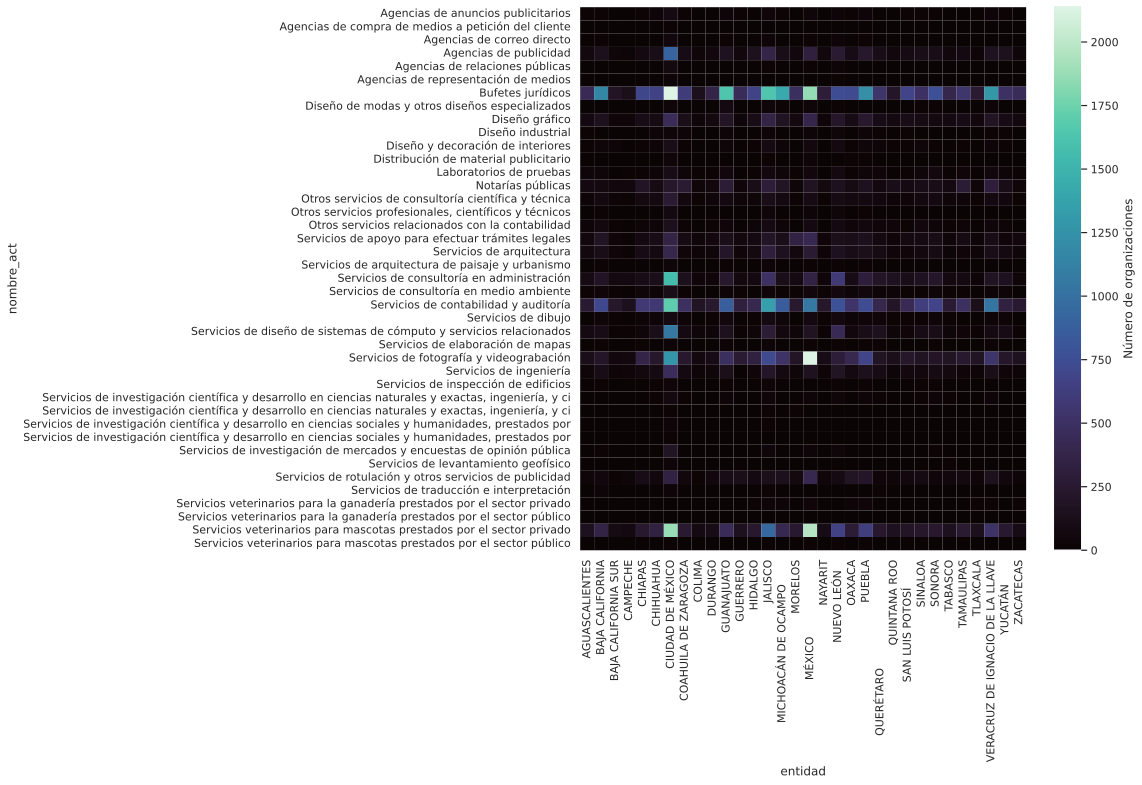

In [206]:
# Heatmap con el n칰mero de organizaciones por tipo de actividad y entidad
plt.subplots(figsize = (10,10))
sns.heatmap(data = df_heatmap_count,
            cmap = 'mako',
            cbar_kws={"label": "N칰mero de organizaciones"})
plt.show()

El mapa de calor anterior muestra que los bufetes jur칤dicos y contables y los servicios veterinarios son los servicios profesionales y t칠cnicos m치s comunes en el pa칤s. 

Por otro lado, se observa que los servicios profesionales y t칠cnicos tienden a concentranrse de manera importante en Ciudad de M칠xico, Nuevo Le칩n y Jalisco.

In [193]:
# Dataset para construir un mapa de calor con el promedio de empleados por tipo de actividad y entidad
df_heatmap_ocu = pd.pivot_table(df[['nombre_act', 'entidad', 'per_ocu_int']], index = 'nombre_act', columns = 'entidad', values = 'per_ocu_int', aggfunc = 'mean', fill_value = 0)
df_heatmap_ocu.index = df_heatmap_ocu.index.map(lambda x: x[:120])
df_heatmap_ocu.head()

entidad                                             AGUASCALIENTES  \
nombre_act                                                           
Agencias de anuncios publicitarios                        2.500000   
Agencias de compra de medios a petici칩n del cli...       20.500000   
Agencias de correo directo                                2.500000   
Agencias de publicidad                                    5.596491   
Agencias de relaciones p칰blicas                           2.500000   

entidad                                             BAJA CALIFORNIA  \
nombre_act                                                            
Agencias de anuncios publicitarios                         6.031250   
Agencias de compra de medios a petici칩n del cli...         2.500000   
Agencias de correo directo                                11.192308   
Agencias de publicidad                                    10.053571   
Agencias de relaciones p칰blicas                            8.500000   

entidad                                             BAJA CALIFORNIA SUR  \
nombre_act                                                                
Agencias de anuncios publicitarios                             3.600000   
Agencias de compra de medios a petici칩n del cli...             0.000000   
Agencias de correo directo                                    11.500000   
Agencias de publicidad                                         4.828125   
Agencias de relaciones p칰blicas                                2.500000   

entidad                                             CAMPECHE  CHIAPAS  \
nombre_act                                                              
Agencias de anuncios publicitarios                    2.5000     3.60   
Agencias de compra de medios a petici칩n del cli...    0.0000     2.50   
Agencias de correo directo                            2.5000     2.50   
Agencias de publicidad                                4.6875     4.72   
Agencias de relaciones p칰blicas                       2.5000     2.50   

entidad                                             CHIHUAHUA  \
nombre_act                                                      
Agencias de anuncios publicitarios                   8.315789   
Agencias de compra de medios a petici칩n del cli...   2.500000   
Agencias de correo directo                           6.416667   
Agencias de publicidad                               5.706140   
Agencias de relaciones p칰blicas                     11.200000   

entidad                                             CIUDAD DE M칄XICO  \
nombre_act                                                             
Agencias de anuncios publicitarios                         31.548193   
Agencias de compra de medios a petici칩n del cli...         25.500000   
Agencias de correo directo                                  9.418367   
Agencias de publicidad                                     27.009945   
Agencias de relaciones p칰blicas                            24.037879   

entidad                                             COAHUILA DE ZARAGOZA  \
nombre_act                                                                 
Agencias de anuncios publicitarios                              8.156250   
Agencias de compra de medios a petici칩n del cli...             20.500000   
Agencias de correo directo                                      5.437500   
Agencias de publicidad                                          7.378788   
Agencias de relaciones p칰blicas                                 3.600000   

entidad                                                COLIMA  DURANGO  ...  \
nombre_act                                                              ...   
Agencias de anuncios publicitarios                  10.100000     9.75  ...   
Agencias de compra de medios a petici칩n del cli...   0.000000     0.00  ...   
Agencias de correo directo                           2.500000     2.50  ...   
Agencias de publicidad                               4.725806     6.93  ...   
Agenc

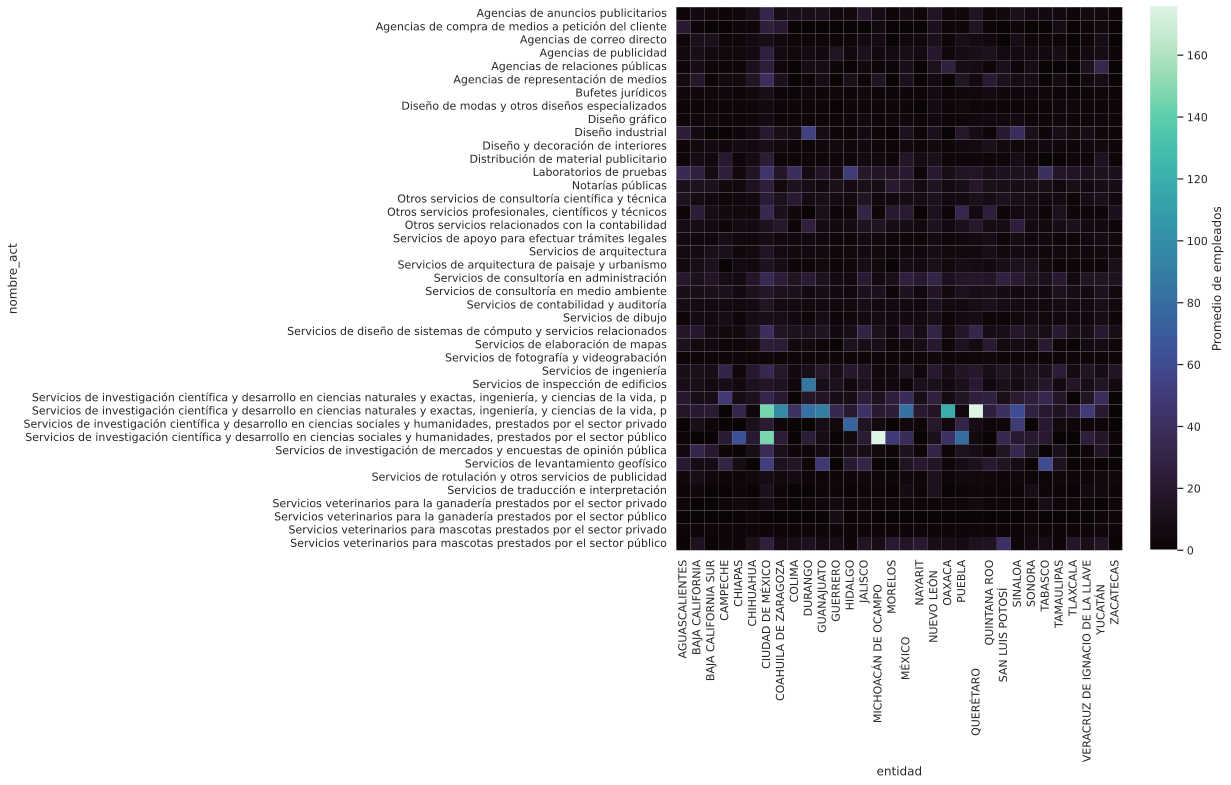

In [207]:
# Heatmap con el n칰mero promedio de empleados por tipo de actividad y entidad
plt.subplots(figsize = (10,10))
sns.heatmap(data = df_heatmap_ocu,
            cmap = 'mako',
            cbar_kws={"label": "Promedio de empleados"})
plt.show()

El mapa de calor anterior muestra que los servicios de investigaci칩n cient칤fica tanto en ciencias naturales como ciencias sociales son los tipos de actividades que exhiben un promedio m치s elevado de empleados.

Por otro lado, como era de esperarse, es posible encontrar un n칰mero m치s alto de promedio de empleados en las organizaciones de servicios profesionales y t칠cnicos en Ciudad de M칠xico y Nuevo Le칩n.

## 3. Serie de tiempo

Una serie de tiempo no es m치s que el cambio de una variable num칠rica a trav칠s de una variable temporal. Ya que cuentas con ambas, construyamos una de estas series.

Completa las siguientes tareas:
- Construye una serie de tiempo haciendo uso de la columna de fechas de tu conjunto de datos y alguna de las variables num칠ricas de tu inter칠s.
- Realiza tantas series como creas conveniente para responder tus preguntas y saciar tu curiosidad 游땔

In [195]:
# Dataset para el gr치fico de lineas por fecha de alta
serie = df.groupby(by= 'fecha_alta', as_index = False).agg(sum_ocu = ('per_ocu_int', 'sum'), mean_ocu = ('per_ocu_int', 'mean'), count = ('entidad','count')).\
        sort_values(by = 'fecha_alta')
serie.head()

fecha_alta   sum_ocu   mean_ocu  count
0 2010-07-01  244778.0   7.626196  32097
1 2011-03-01    5230.5  17.435000    300
2 2012-06-01   14681.5  20.476290    717
3 2013-07-01    2213.5   7.849291    282
4 2014-12-01  121059.0   6.310086  19185

In [196]:
# Dataset para el gr치fico de lineas por fecha de alta en formato tidy data
serie_tidy = pd.melt(serie, id_vars = 'fecha_alta', var_name = 'metric', value_name = 'value' ).sort_values(by = 'fecha_alta')
serie_tidy.head()

fecha_alta    metric          value
0  2010-07-01   sum_ocu  244778.000000
18 2010-07-01  mean_ocu       7.626196
36 2010-07-01     count   32097.000000
1  2011-03-01   sum_ocu    5230.500000
19 2011-03-01  mean_ocu      17.435000

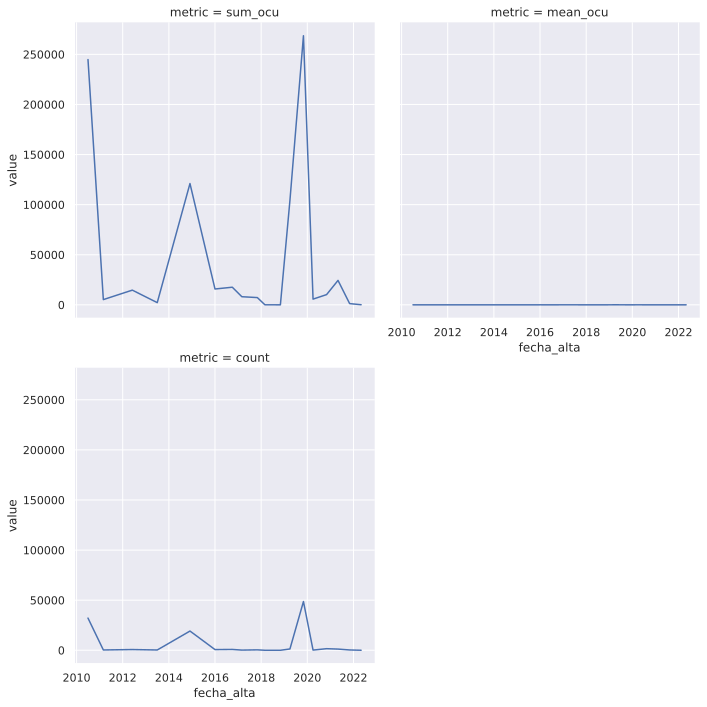

In [197]:
# Gr치ficos de l칤neas de la suma de personal ocupado, promedio de personal ocupado y conteo de organizaciones vs. fecha de alta
sns.relplot(data = serie_tidy, x = 'fecha_alta', y= 'value', kind= 'line', col = 'metric', col_wrap = 2)

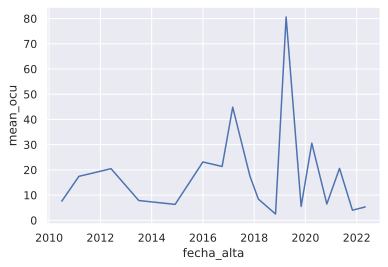

In [198]:
# Gr치fico de l칤nea del promedio de personal ocupado vs. fecha de alta
sns.lineplot(data = serie, x = 'fecha_alta', y= 'mean_ocu')

Los gr치ficos de l칤neas anteriores sugieren que en 2010 y en 2019 un gran n칰mero de organizaciones oferentes de servicios profesionales y t칠cnicos fueron dadas de alta en el DENUE del INEGI. Por otro lado, tambi칠n es posible observar que las organizaciones con un n칰mero de empleados mayor fueron dadas de alta en 2019.

In [199]:
# Dataset para el gr치fico de lineas de servicios de dise침o de sistemas de c칩mputo y servicios relacionados por fecha de alta
serie_comp = df[df['nombre_act'] == 'Servicios de dise침o de sistemas de c칩mputo y servicios relacionados'].groupby(by= 'fecha_alta', as_index = False).\
              agg(sum_ocu = ('per_ocu_int', 'sum'), mean_ocu = ('per_ocu_int', 'mean'), count = ('entidad','count')).\
              sort_values(by = 'fecha_alta')
serie_comp.head()

fecha_alta  sum_ocu   mean_ocu  count
0 2010-07-01  20912.5  35.686860    586
1 2011-03-01    635.0  31.750000     20
2 2012-06-01   2412.0  30.531646     79
3 2013-07-01    119.5  14.937500      8
4 2014-12-01  11020.0  21.821782    505

In [200]:
# Dataset para el gr치fico de lineas de servicios de dise침o de sistemas de c칩mputo y servicios relacionados por fecha de alta en formato tidy data
serie_comp_tidy = pd.melt(serie_comp, id_vars = 'fecha_alta', var_name = 'metric', value_name = 'value' ).sort_values(by = 'fecha_alta')
serie_comp_tidy.head()

fecha_alta    metric        value
0  2010-07-01   sum_ocu  20912.50000
15 2010-07-01  mean_ocu     35.68686
30 2010-07-01     count    586.00000
1  2011-03-01   sum_ocu    635.00000
16 2011-03-01  mean_ocu     31.75000

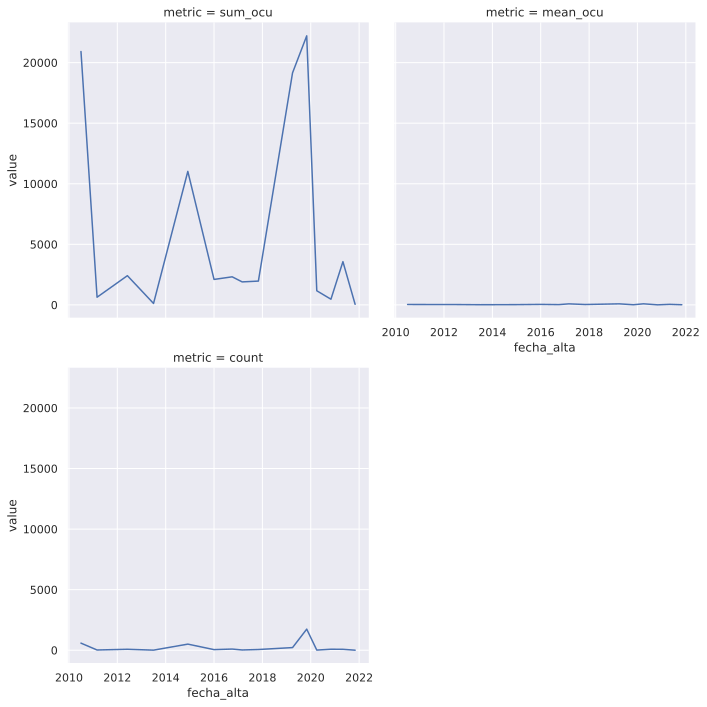

In [201]:
# Gr치ficos de l칤neas de la suma de personal ocupado, promedio de personal ocupado y conteo de organizaciones de servicios de dise침o de sistemas de c칩mputo y servicios relacionados vs. fecha de alta
sns.relplot(data = serie_comp_tidy, x = 'fecha_alta', y= 'value', kind= 'line', col = 'metric', col_wrap = 2)

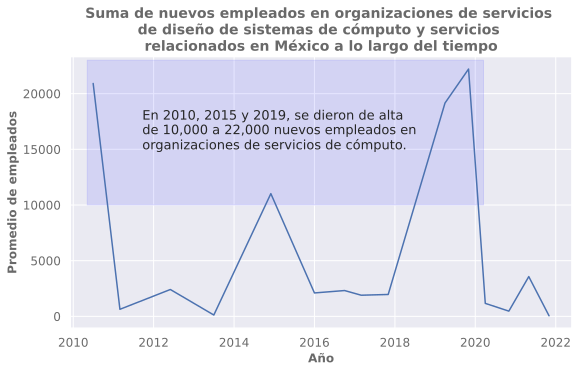

In [311]:
# Gr치ficos de l칤neas de la suma de personal ocupado de organizaciones de servicios de dise침o de sistemas de c칩mputo y servicios relacionados vs. fecha de alta
fig, ax = plt.subplots(figsize = (9,5))
sns.lineplot(data = serie_comp, x = 'fecha_alta', y = 'sum_ocu')
plt.xticks(color = 'dimgray', fontsize = 12)
plt.yticks(color = 'dimgray', fontsize = 12)
plt.xlabel('A침o', fontweight = 'bold', color = 'dimgray', fontsize = 12)
plt.ylabel('Promedio de empleados', fontweight = 'bold', color = 'dimgray', fontsize = 12)
plt.title('Suma de nuevos empleados en organizaciones de servicios \nde dise침o de sistemas \
de c칩mputo y servicios \nrelacionados en M칠xico a lo largo del tiempo', fontweight = 'bold', color = 'dimgray', fontsize = 14)
plt.text(734400, 15000, 'En 2010, 2015 y 2019, se dieron de alta \nde 10,000 a 22,000 nuevos empleados en \norganizaciones de servicios de c칩mputo.', fontsize = 13)

rect = patches.Rectangle((733900, 10000), 3600, 13000, linewidth=1, edgecolor='blue', facecolor='blue', alpha = 0.1)
ax.add_patch(rect)

plt.show()

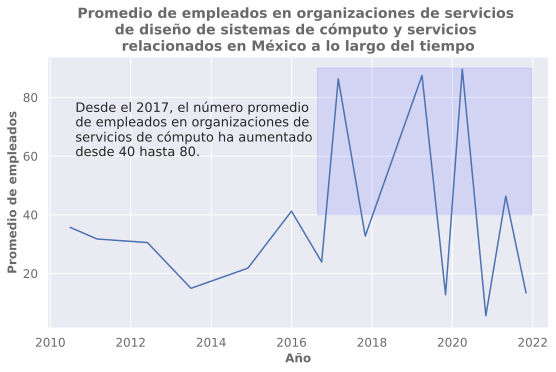

In [280]:
# Gr치ficos de l칤neas del promedio de personal ocupado de organizaciones de servicios de dise침o de sistemas de c칩mputo y servicios relacionados vs. fecha de alta
fig, ax = plt.subplots(figsize = (9,5))
sns.lineplot(data = serie_comp, x = 'fecha_alta', y = 'mean_ocu')
plt.xticks(color = 'dimgray', fontsize = 12)
plt.yticks(color = 'dimgray', fontsize = 12)
plt.xlabel('A침o', fontweight = 'bold', color = 'dimgray', fontsize = 12)
plt.ylabel('Promedio de empleados', fontweight = 'bold', color = 'dimgray', fontsize = 12)
plt.title('Promedio de empleados en organizaciones de servicios \nde dise침o de sistemas \
de c칩mputo y servicios \nrelacionados en M칠xico a lo largo del tiempo', fontweight = 'bold', color = 'dimgray', fontsize = 14)
plt.text(734000, 60, 'Desde el 2017, el n칰mero promedio \nde empleados en organizaciones de \nservicios de c칩mputo ha aumentado \ndesde 40 hasta 80.', fontsize = 13)

rect = patches.Rectangle((736200, 40), 1950, 50, linewidth=1, edgecolor='blue', facecolor='blue', alpha = 0.1)
ax.add_patch(rect)

plt.show()

Los gr치ficos de l칤neas anteriores de igual manera sugieren que un gran n칰mero de organizaciones oferentes de servicios de dise침o de sistemas de c칩mputo y servicios relacionados fueron dadas de alta en el DENUE del INEGI en 2010, 2015 y 2019, y que, en consecuencia, un gran n칰mero de personas ingresaron a trabajar en el sector de la tecnolog칤a en esos mismos a침os.

Por otro lado, tambi칠n se advirti칩 una tendencia a que las organizaciones oferentes de servicios de dise침o de sistemas de c칩mputo y servicios relacionados crezcan en el n칰mero promedio de empleados conforme el pasar de los a침os. Sin embargo, dicha tendencia se revirti칩 en los a침os de la pandemia 2020-2022.

In [203]:
#End